<a href="https://colab.research.google.com/github/SotaYoshida/Lecture_DataScience/blob/main/notebooks/Python_chapter5_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 確率と疑似乱数

[この章の目的]
コンピュータで確率・乱数を扱う概要を学ぶ。


この章では、確率と擬似乱数について扱います。


In [10]:
#ライブラリをインポートしておきましょう
import random
import numpy as np
from matplotlib import pyplot as plt

## 疑似乱数について

コンピュータで何かの処理を実現したいときや、自然科学や統計学などで様々なことをシミュレーションしたいとき、[確率的な事象]を考えたくなることがよくあります。  

たとえば人◯ゲームや◯鉄のようなゲームを作るときにもサイコロの出目が必要になりますし、技が急所に当たる確率や色違いのポ◯モンが出現する確率などを設定しなければなりません.

真に理想的なサイコロならば1から6の目が出る確率は等しく1/6ですが、このような"理想的な"サイコロは、現実世界でも、コンピュータの上でも実現することはできず、我々人間が乱数をシミュレーションして扱う際には、何らかの確定的な方法で乱数列(**十分ランダムだとみなせる数の集合**)を生成することになります。

真の意味での乱数と区別する意味で、我々が普段ゲームなどで扱う乱数は擬似乱数と呼ばれるべきものです。以下ではめんどくさいので、単に乱数と呼ぶことにします。

**$\clubsuit$ 細かな注**

乱数を生成する方法はいくつもあるが代表的なものはメルセンヌツイスタと呼ばれる方法で、多くのプログラミング言語でも採用されている。

また*モンテカルロ法*と検索すると(主に学術的な分野で)乱数がどのように活用されているか、雰囲気を味わうことができます。  
ちなみにモンテカルロはカジノで有名なモナコの地名Monte Carloに由来。

## Pythonでの乱数生成

Pythonでは`random`モジュールを使えば簡単に乱数を使用することができる。  

In [ ]:
random.randint(1,6)

2

のように`random.randint(最小値,最大値)`とすると指定した閉区間の整数値をランダムに生成することができる。  
上のコードセルを実行するたびに答えが変わること(ランダム性)も確かめよう。

今の場合、最小値に1、最大値に6を採用したことで、この乱数をサイコロの出目とみなすことができる。  
```range```などと違い、最大値の6も含まれていることに注意! 紛らわしい...。

100個のサイコロの出目を保持しておきたければ、２章で学習したリスト内包表記を用いて

In [ ]:
a = [random.randint(1,6) for i in range(100)]
print(a)

[1, 4, 5, 3, 4, 2, 2, 5, 5, 6, 1, 2, 6, 3, 2, 4, 3, 6, 6, 5, 5, 6, 4, 4, 2, 3, 3, 5, 4, 6, 6, 6, 6, 4, 3, 2, 1, 5, 6, 4, 3, 2, 5, 2, 6, 4, 3, 6, 1, 3, 5, 2, 6, 3, 2, 3, 3, 3, 1, 4, 1, 5, 2, 6, 4, 4, 4, 3, 2, 3, 6, 6, 3, 1, 2, 6, 1, 3, 1, 6, 2, 5, 2, 6, 5, 2, 1, 1, 4, 1, 2, 3, 1, 2, 5, 2, 3, 6, 2, 3]


などとすればよい。$10^p$回 ($p=1,2,...,6)$回サイコロを振った場合の出目をそれぞれヒストグラムにしてみると...  





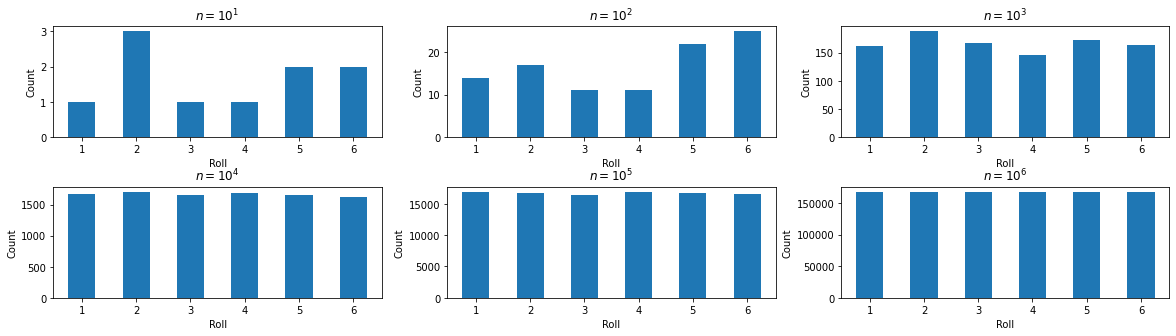

In [ ]:
# サンプルの数を指定し、それぞれのサイコロの出目を用意して入れ子のリストにする
ps = range(1,7) #　10^p 次数(power)
Ns = [10**p for p in ps ]
results =[ [random.randint(1,6) for i in range(N) ] for N in Ns ]

# ヒストグラムのビンの始点,終点,ステップを定義
tbin = np.arange(0.5, 7.5, 1) 

# 作図 (axを用いて、一つのグラフに6つの領域を用意して作画する)
# add_subplit(n,m,i)で、縦n個, 横m個の領域を用意した場合の　i番目(列方向,行方向の順番にカウントする. a行b列の小領域は i = (a-1)*m + b)
fig = plt.figure(figsize=(20,5))
axs = [ fig.add_subplot(2,3,i) for i in range(1,len(results)+1 ) ] #データの個数に応じて小領域の数を自動で変えたい場合は"(2,3"部分の工夫が必要。
for i in range(len(axs)):
    axs[i].set_xlabel("Roll")
    axs[i].set_ylabel("Count")
    axs[i].set_title("$n=10^"+str(ps[i])+"$") #$$で囲むとlatex表記を用いることができる
    axs[i].hist(results[i],bins=tbin,rwidth=0.5)  #ヒストグラムを描画
#グラフ間の縦の間隔hspaceをdefault値(0.3)から少し大きく調整
plt.subplots_adjust(hspace=0.45) 
plt.show()
plt.close()

1-6の出る目の頻度が確率から期待される振る舞いに漸近していく事がわかる.  c.f. 大数の法則

今のようなサンプル数が大きく異なるヒストグラムを比較する場合、縦軸のスケールを揃えて比較するほうが良い。**相対的な頻度**になおしてみよう。  
そのためには、```density```というオプションをオン(`True`)にするか、明示的に各サンプルの"重み"を```weights```でリスト(`ndarray`)として与えると良い。

後者は確率分布などを扱うときに便利なオプションとなるが、この授業では扱わない。  
```density=True```は"各サンプルの重みを等価にする"という```weights```を指定する場合の特殊な例に相当する.  つまりサンプル数が$N$ならweights=[すべての要素が$1/N$の配列(リストやndarray)]とするのと等価。

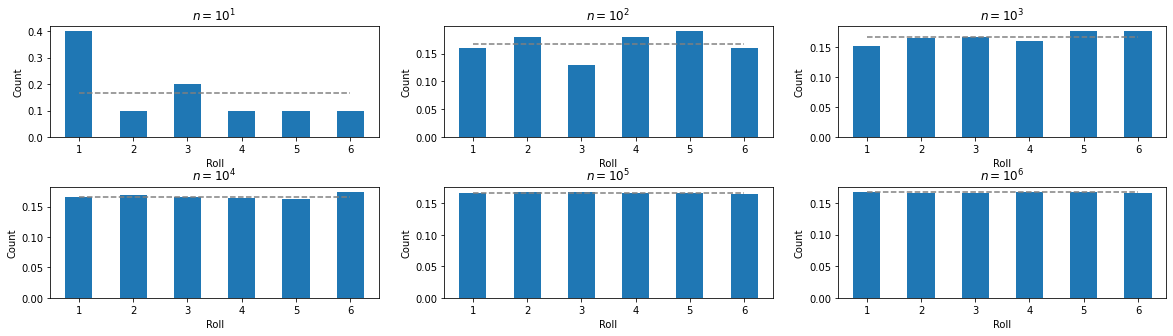

In [ ]:
ps = [1,2,3,4,5,6]
Ns = [10**p for p in ps ]
results =[ [random.randint(1,6) for i in range(N) ] for N in Ns ]
tbin = np.arange(0.5,7.5,1) 
fig = plt.figure(figsize=(20,5))
axs = [ fig.add_subplot(2,3,i) for i in range(1,len(results)+1) ]
for i in range(len(axs)):
    axs[i].set_xlabel("Roll")
    axs[i].set_ylabel("Count")
    axs[i].set_title("$n=10^"+str(ps[i])+"$") 
    axs[i].hist(results[i],bins=tbin,rwidth=0.5,density=True) #density=Trueオプションを指定
    axs[i].plot([1,6],[1/6,1/6],color="gray",linestyle="dashed") #ココを追加した
plt.subplots_adjust(hspace=0.45) 
plt.show()
plt.close()


---

以下では、`random`モジュールのよく使う(?)機能をいくつか紹介する.

>また、`numpy`にも```numpy.random```という下位のモジュールがあるので、  `random`を`numpy.random`としても多くの場合では互換性がある。```import numpy as np```とあだ名を使うなら`random`を`np.random`に置き換えて試してみよう。  
※ `randint`の場合は、`np.random.randint`だと終点を含まないなど、微妙な違いがあるので注意。モジュールの使い方や実装については[公式Document](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html?highlight=randint#numpy.random.randint)を参考にすること。これは`numpy`に限らない。

In [4]:
# numpyの中にあるrandintで(1,6)を指定し、サンプルをたくさん(10^6)作ってみる。
# それをsetで重複を取り除いて、現れた数を見てみると...6がない。
Nsample = 10**6
print("randomの(random.randintを使う)場合 =>", set([random.randint(1,6) for i in range(Nsample)]))
print("numpyの(np.random.randintを使う)場合 =>", set(np.random.randint(1,6, Nsample)))

randomの(random.randintを使う)場合 => {1, 2, 3, 4, 5, 6}
numpyの(np.random.randintを使う)場合 => {1, 2, 3, 4, 5}


## 無作為抽出

リストやrangeなどからランダムに要素を選びたいときには```random.choice```が便利だ。  
(たとえば[出席番号のリストからランダムに選ぶ]などをイメージしよう)  

ループに入れて5回くらい実行してみましょう。

In [ ]:
for i in range(5):
    ## 引数(リスト)からランダムに要素を抽出する
    a = random.choice([1, 3, 5, 6]) 

    ## 引数(range,0から99)からランダムに要素を抽出する
    b = random.choice(range(100)) 

    ## 引数(リスト)からランダムに要素を抽出する
    c = random.choice(["日本","アメリカ","中国"])     
    
    print("a=>", a, "\tb=>", b, "\tc=>", c)

a=> 6 	b=> 75 	c=> 日本
a=> 1 	b=> 13 	c=> アメリカ
a=> 1 	b=> 88 	c=> 中国
a=> 6 	b=> 10 	c=> 中国
a=> 1 	b=> 98 	c=> 日本


「0から99までの100個の整数値から重複を許さずに10個選びたい」といった場合は、
```numpy.random```の```choice```関数を使うのがよい。

In [ ]:
import numpy as np
np.random.choice(range(100),10,replace=False) # replace = True/Falseで重複を認めるかどうかを指定できる 

array([86, 28, 99, 31, 17, 92, 89, 50, 76, 69])

上の関数の`replace=True` or `replace=False`を変えて何回か実行してみて、抽出された数に重複があるかどうかを確かめてみよう。

ちなみに選んだものをソートしたければ組み込み関数`sorted`などを使うと良い:

In [9]:
import numpy as np
sorted_array = sorted( np.random.choice(range(100),10,replace=False)  )

print(sorted_array)

[22, 29, 30, 31, 61, 62, 67, 72, 81, 86]


## 一様分布からの乱数生成


上記のような離散的な乱数とは異なり、連続的な数について乱数が必要になる場合もある。

その一つの例である一様乱数は、ある"有限"区間での確率(密度)が等しい確率に従う乱数で、  
```random.uniform()```関数を使えば、指定した区間での一様乱数を生成することができる。


In [5]:
#[1.0, 10.0)または[1.0, 10.0]からの一様乱数 
# randomモジュールでは半開区間/閉区間どちらになるかはrounding(丸め操作)に依存するみたい
random.uniform(1.0,10.0) 

8.216151921350379

xとyの値を[-1,1]の範囲でランダムに10000サンプル生成してplotしてみよう

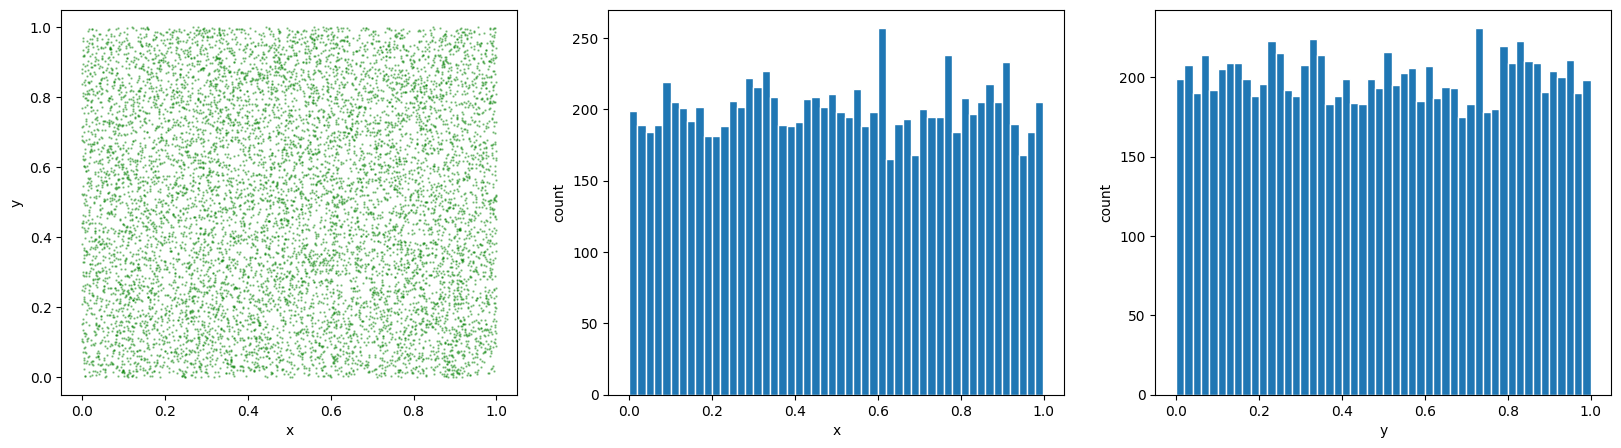

In [18]:
num = 10000
xs = [ random.uniform(-1,1) for i in range(num)]
ys = [ random.uniform(-1,1) for i in range(num)]

# 3つの領域に、散布図・ｘのヒストグラム・yのヒストグラムを描く
fig = plt.figure(figsize=(20,5))
axs = [fig.add_subplot(131),fig.add_subplot(132),fig.add_subplot(133)]
axs[0].scatter(xs,ys,color="green",s=0.5,alpha=0.4) 
axs[0].set_xlabel("x");axs[0].set_ylabel("y")
axs[1].set_xlabel("x");axs[1].set_ylabel("count")
axs[2].set_xlabel("y");axs[2].set_ylabel("count")
axs[1].hist(xs,bins=50,ec="w") #xのヒストグラム (binの数50はいい加減に選んだ)
axs[2].hist(ys,bins=50,ec="w") #yのヒストグラム 同じく
plt.show()
plt.close()

**$\clubsuit$** 散布図とヒストグラムをまとめて描く

もうちょっとかっこよく描きたければ`seaborn`というモジュールの`jointplot`を用いると良い。

In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", height=4)

### じゃんけん関数



乱数を使ってじゃんけんをする関数を作ってみましょう。

In [ ]:
def Janken( ):    
    r = ["グー","チョキ","パー"]
    return r[random.randint(0,2)] 

In [ ]:
Janken()

'チョキ'

In [ ]:
#あるいは、手を0,1,2として計算する関数とじゃんけんの手に反映させる部分を分けても良い

def Janken():
    return random.randint(0,2)
RPS = ["グー","チョキ", "パー"]  #integer to Rock-Paper-Scissors

#5回手を表示させてみる
for i in range(5): 
    print(RPS[Janken()])

パー
パー
パー
グー
パー


今の場合```Janken()```は、単に1/3の確率で手を選ぶ関数だが、これを拡張していけば確率を1/3から変動させたじゃんけんの実装も可能。
２つの手の確率を指定すれば、残りも一意に決まるので、たとえば、0から1の区間から一様乱数を発生させて、ある領域に含まれたらグー、ある領域に含まれたらチョキ、残りはパー、とすれば良い。

In [4]:
def my_RPS(p_rock, p_scissors):
    r = random.uniform(0,1)
    if r <= p_rock:
        return 0
    elif r <= p_rock + p_scissors:
        return 1
    else:
        return 2

# 20%でグー(0)、30%でチョキ(1)、50%でパー(2)を出す人の手を10^5回集計してみる
data = [ my_RPS(0.2, 0.3) for _ in range(10**5) ]
print("グーの割合 =>", data.count(0)/len(data))
print("チョキの割合 =>", data.count(1)/len(data))
print("パーの割合 =>", data.count(2)/len(data))

グーの割合 => 0.19961
チョキの割合 => 0.30014
パーの割合 => 0.50025


In [ ]:
じゃんけん関数を工夫したり、サザ◯さんやドラ◯もんのじゃんけんのパターンを解析することで、  
毎週土曜や日曜にドラ◯もんやサザ◯さんを倒す関数を作ってみるのも面白そうです。

### $\clubsuit$一様乱数を用いた円周率の計算

プログラミングでド定番の、乱数を使って円周率を求める方法も  
Pythonならサクッと実装することができます。

In [ ]:
def pi_approx(p):
    num = 10**p
    x = np.random.rand(num)
    y = np.random.rand(num)
    return  4*np.sum(x*x+y*y < 1.0) / num

pi_approx(5) 

3.13704

このコードでは、$10^p$組の一様乱数を発生させて、  
円弧の中に入った個数/全体の数(num)で割ることで円周率を求めています。  
(1/4円の面積は$\pi$/4で、正方形の面積が1であることを使う)  

<img src="https://github.com/SotaYoshida/Lecture_DataScience/blob/main/notebooks/pic_for_notebook/circle_random.png?raw=true" width=40%>  

乱数により生成するサンプルの数を増やしていって、精度が改善する様子を見てみよう。

p= 1 	 pi_approx 2.8 log10(abs(diff)) -0.46649147797051027
p= 2 	 pi_approx 2.92 log10(abs(diff)) -0.6544446417698763
p= 3 	 pi_approx 3.1 log10(abs(diff)) -1.3809833709877704
p= 4 	 pi_approx 3.1316 log10(abs(diff)) -2.000319167792708
p= 5 	 pi_approx 3.1458 log10(abs(diff)) -2.3759917290460537
p= 6 	 pi_approx 3.140808 log10(abs(diff)) -3.105322034013356
p= 7 	 pi_approx 3.1410364 log10(abs(diff)) -3.254727173274235
p= 8 	 pi_approx 3.14153816 log10(abs(diff)) -4.263654581782899


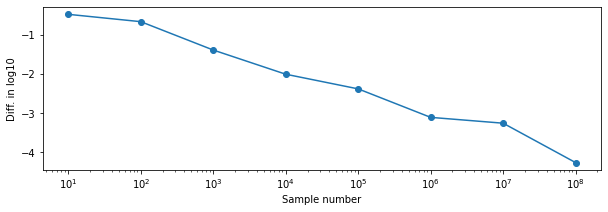

In [ ]:
np.random.seed(1234)
sum = []
for p in range(1,9): #サンプル数を一桁ずつ増やす
    tmp = pi_approx(p)
    sum += [[10**p, np.log10(abs(tmp-np.pi))]]
    print("p=",p, "\t", "pi_approx", tmp, "log10(abs(diff))", np.log10(abs(tmp-np.pi)))
sum = np.array(sum).T

fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
ax.set_xlabel("Sample number")
ax.set_ylabel("Diff. in log10")
ax.set_xscale("log")
ax.plot(sum[0], sum[1],marker="o")
plt.show()
plt.close()

あまり効率は良くない($10^8$サンプルあっても４桁くらいしか合っていない)。    
ちなみに2つの領域に生成された乱数の比から円周率を計算する方法では、領域の面積が近くなるような設定で計算する方が精度が良い。  

なお、上のコードはメモリを食うので、これ以上$p$を増やすとだんだんGoogle Colab上では計算が厳しくなってくる。それまでの作業にも依存するが、$p\geq9$にして実行するとクラッシュする。このように場合によってはメモリ使用量も気にする必要がある。



In [7]:
import numpy as np
def pi_approx_mem(p):
    num = 10**p
    x = np.random.rand(num)
    y = np.random.rand(num)
    print("p="+str(p)+"のとき => ndarrayのサイズは~", 
          str("%5.2f" % ((x.nbytes+y.nbytes) / 1024**3)) , " GB程度")
    return  4*np.sum(x*x+y*y < 1.0) / num

pi_approx_mem(7)
pi_approx_mem(8) 

p=7のとき => ndarrayのサイズは~  0.15  GB程度
p=8のとき => ndarrayのサイズは~  1.49  GB程度


3.14159012

## 正規分布からの乱数生成



正規分布は多くの特徴的な性質を有しています.  
それらは後述するとして...正規分布に従う乱数を生成するには  
```random.gauss()```もしくは```random.normalvariate()```  を用いればよい.    
※両者は基本的に同じだが、前者のほうが高速らしい

In [ ]:
a = random.gauss(0.0, 1.0) #平均0.0,標準偏差1.0の正規分布からの乱数生成

サンプル数を何通りか作って、正規分布になっているかチェック

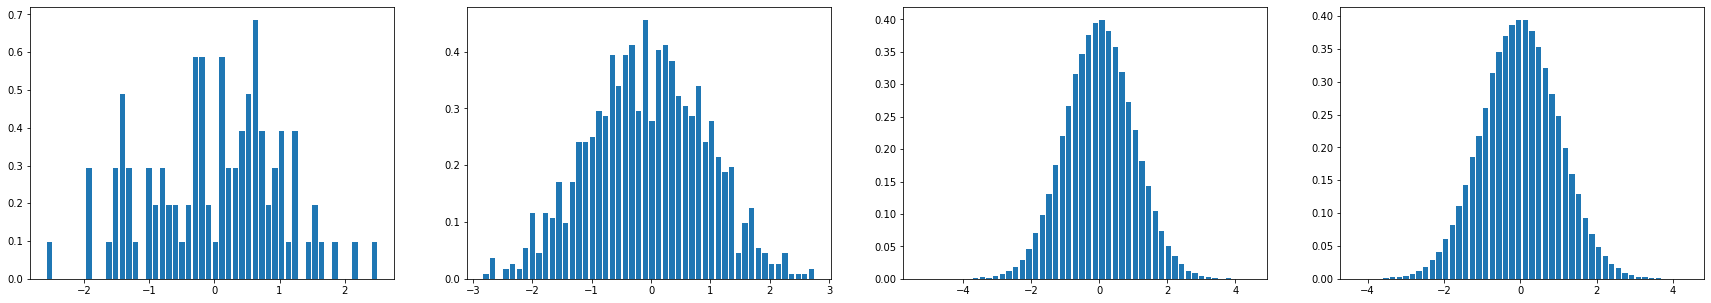

mu,sigma a: 0.0067173334130862326 1.005917217916256
mu,sigma b: -0.062043437506205806 0.9809649613610115
mu,sigma c: 0.0029861824182547607 1.0029708839095104
mu,sigma c: 2.6103380608022205e-05 1.0002128303060538


In [ ]:
Na = 100; Nb = 1000; Nc = 100000
a = [ random.gauss(0.0, 1.0) for i in range(Na)] 
b = [ random.gauss(0.0, 1.0) for i in range(Nb)] 
c = [ random.gauss(0.0, 1.0) for i in range(Nc)] 
c2 = [ random.normalvariate(0.0, 1.0) for i in range(Nc)]  #一応normalvariateも使ってみる

fig = plt.figure(figsize=(30,5))
axs = [ fig.add_subplot(141),fig.add_subplot(142),fig.add_subplot(143),fig.add_subplot(144)]
axs[0].hist(a,bins=50,density=True,rwidth=0.8)
axs[1].hist(b,bins=50,density=True,rwidth=0.8)
axs[2].hist(c,bins=50,density=True,rwidth=0.8)
axs[3].hist(c2,bins=50,density=True,rwidth=0.8)
plt.show()
plt.close()

#平均と分散も計算してみる
print("mu,sigma a:",np.mean(a), np.std(a))
print("mu,sigma b:",np.mean(b), np.std(b))
print("mu,sigma c:",np.mean(c), np.std(c))
print("mu,sigma c:",np.mean(c2), np.std(c2))

サンプル数が増えるにつれて、正規分布に収束していく様子が見られます. 

## 乱数の種(seed)の固定

これまでのプログラムでは、実行の度に答えが変わりました。  

擬似的にでもランダム性が担保されているというのは便利だが、  
実際にプログラミングで乱数を使って何かの作業を実装したいときは、  
何か直感と反するような振る舞いをコードが示した際、  
それがランダム性からくる偶然の挙動なのか、コードにバグがあるせいなのかを特定したくなる。  
そんなときには、
```random.seed(適当な整数値)```   
を使って乱数の"種"を指定することで、再現性のあるコードにすることができます。  
たとえばサイコロの例でいうと

In [ ]:
[ random.randint(1,6) for i in range(10)]

[3, 3, 4, 2, 3, 3, 2, 6, 2, 6]

は実行する度に答えが変わるが

In [ ]:
random.seed(1234) 
[ random.randint(1,6) for i in range(10)]

[4, 1, 1, 1, 5, 1, 6, 6, 1, 1]

は何度実行しても同じ答えになる。これは、乱数の生成前に"種"を指定しているため。

イメージとしては、「無限に長い疑似乱数の羅列の中から10個並んだ数を選ぶときに、  
どこからどこまでを抽出するかを指定する」のが、  
この```random.seed```関数です(細かいことを無視すると、だいたいこんなイメージ).  

注意点としては、たとえばループを回して乱数を生成するときに
``` 
for i in range(10):
    random.seed(1)
    print( random.uniform(0,1) )
```
などとすると、乱数を生成する前に毎回seedが1に固定されるので  
毎回同じ乱数になってしまうので、意図した挙動になるブロックで使うこと。


**余談**  
古いゲームだと、起動してからの経過時間が乱数の種になっていることが多いようで、  
このパターンを調べることができれば、  
原理的には(1/30~1/60秒程度の正確な入力が可能なら)望むようにゲームをスイスイ攻略することもできます。

これを利用して攻略を進めたり、コンピュータにゲームの操作をやらせて、  
メタル◯ライムに会心の一撃を食らわせてレベルアップしまくる動画などが昔はやりました(今も時々ある)。




## 正規分布に関して

この授業は確率・統計の授業ではないので、深入りはしませんが、  
正規分布(ガウス分布,ガウシアン)に少し触れておきます.  
(厳密性は少々犠牲にし、変数が1次元の場合の正規分布に限る)

正規分布が重要である理由はいくつかありますが、
* 世の中に(近似的に)正規分布に従う確率変数がたくさんある
* "性質が良い"(扱いやすい)確率分布である

の２点が代表的なところでしょうか。  
たとえば、身長や体重の分布や、大学入試センター/共通試験の得点の分布なども、正規分布に近いことが知られています。

ある変数$x$が中心$\mu$、標準偏差$\sigma$の正規分布に従うとき、  
$x$の確率密度関数$f(x)$は、以下の様に表現されます.

$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp{(-\frac{(x-\mu)^2}{2\sigma^2})}$

一見、難しそうな式ですが、$x=\mu$で最大値となり、  
$x$が$\mu$から離れていくとどんどん値が小さくなる関数になっています。

関数の形を見てなんとなく「平均値の周りに広がった分布になっているんだな」  
と理解できれば問題は有りません。

実際に、上の$x$についての関数$f(x)$の値を、$\mu$や$\sigma$を変えながらplotしてみると...

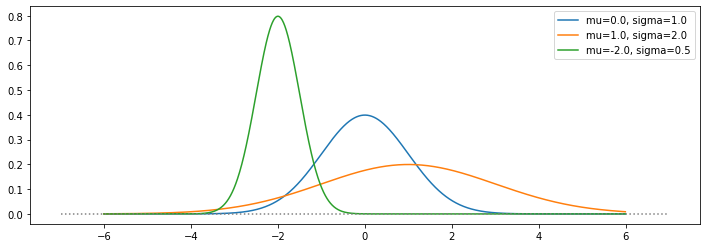

In [ ]:
def gaussian(mu,sigma,xr):
    return np.exp(- (xr-mu)**2 / (2.0 * sigma**2) ) / np.sqrt(2.0*np.pi * sigma**2)

xr = np.arange(-6.0,6.0,0.01)
yr1 = gaussian(0.0,1.0,xr); yr2 = gaussian(1.0,2.0,xr); yr3=gaussian(-2.0,0.5,xr)

fig= plt.figure(figsize=(12,4))
plt.plot(xr,yr1,label="mu=0.0, sigma=1.0")
plt.plot(xr,yr2,label="mu=1.0, sigma=2.0")
plt.plot(xr,yr3,label="mu=-2.0, sigma=0.5")
plt.plot([-7,7],[0,0],color="gray", linestyle="dotted")
plt.legend()
plt.show()
plt.close()

こんな感じ。このような形状の分布を示すデータ(量)が世の中には溢れています。

指数関数$\exp$の前についている係数$1/\sqrt{2\pi \sigma^2}$は、  
この関数をあらゆるxの値で足し上げたときに、その値が1になるようにつけてあります.  
つまり、x軸と関数$f(x)$が囲む領域の面積=xの全区間での積分$\int^{\infty}_{-\infty}f(x) dx $が1になります.  

こうしておけばどの$\mu,\sigma$を持つ正規分布を考えたときにでも、  
「どこからどこまでの区間の面積が全体に占める割合が何%だ」といった表現が可能になります。  
つまり、確率として扱いやすくなります。

> ちなみに関数$\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}$は、$x$に対する有限区間での積分を解析的に求めることはできず(数値的に求めることはできる)、$x \in [-\infty,\infty]$で積分した場合にのみ、閉じた形で書き下すことができます。  
その際、積分値$\int^\infty_{-\infty}\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}$が、$\sqrt{2\pi \sigma^2}$になります。 c.f. ガウス積分

以下では$\mu=0.0$, $\sigma=1.0$のみを考えることにして、もう少し正規分布の特徴的な性質について見てみましょう。

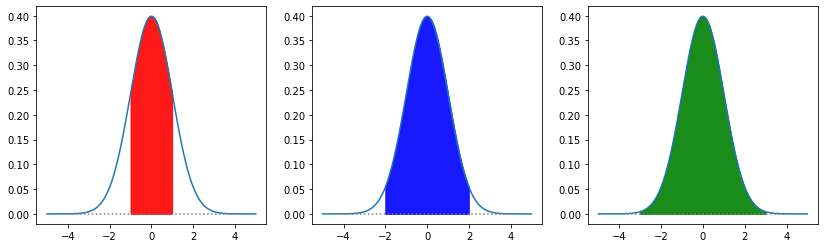

In [ ]:
def gaussian(mu,sigma,xr):
    return np.exp(- (xr-mu)**2 / (2.0 * sigma**2) ) / np.sqrt(2.0*np.pi * sigma**2)

fig= plt.figure(figsize=(14,4))
axs = [ fig.add_subplot(131),fig.add_subplot(132),fig.add_subplot(133)]
xr = np.arange(-5.0,5.0,0.01)
yr = gaussian(0.0,1.0,xr)
for i in range(3):
    axs[i].plot(xr,yr,label="mu=0.0, sigma=1.0")
    axs[i].plot([-4,4],[0,0],color="gray", linestyle="dotted")
x_sig1 = np.arange(-1.0,1.0,0.01)
x_sig2 = np.arange(-2.0,2.0,0.01)
x_sig3 = np.arange(-3.0,3.0,0.01)
axs[2].fill_between(x_sig3, 0.0*x_sig3, gaussian(0.0,1.0,x_sig3),color="green",alpha=0.9)
axs[1].fill_between(x_sig2, 0.0*x_sig2, gaussian(0.0,1.0,x_sig2),color="blue",alpha=0.9)
axs[0].fill_between(x_sig1, 0.0*x_sig1, gaussian(0.0,1.0,x_sig1),color="red",alpha=0.9)
plt.show()
plt.close()

上の図では、$\mu \pm 1\sigma$, $\mu \pm 2\sigma$, $\mu \pm 3\sigma$の領域での正規分布とx軸とが囲む領域を、それぞれ赤色、青色、緑色で塗りつぶしました。  
(1シグマ, 2シグマ, 3シグマと呼んだりします)

これらが占める面積は、それぞれ0.6827, 0.9545,0.9973(いずれも"約")となり、  
68%,95%,99%区間などと呼ぶことも多いです。  
このことは、任意の$\mu,\sigma$を持つ1次元の正規分布について成立します。

正負の値をとる$x$(たくさんの人のなんかの得点とでも思ってください)の分布が  
平均0.0,標準偏差が1.0の**正規分布に従っている場合**(理想的な場合)なら、  
全体の68%程度の人の得点は1シグマ領域(赤)、  
つまり-1から1までの間に分布していることになります。

もちろん、実際の場合、分布は真には正規分布になっていないので、  
平均と標準偏差を計算したときに、いつでも1シグマの中に  
全体の68%が分布しているわけではありません。

### $\clubsuit$ おまけ: 多変数正規分布




上の正規分布の考え方を拡張して、多変数の場合を考えることもできます。

2つ以上の変数であることを明示的に表すため、
多次元正規分布や多変数正規分布などと呼ばれることが多いです。

1次元の正規分布が、中心と分散(あるいは標準偏差(分散の平方根))で特徴づけられたのに対し、
多次元正規分布は、中心(ベクトル)と共分散(行列)によって特徴づけられます。

$N$個の変数が、
平均を$\boldsymbol{\mu}$,共分散を$\Sigma$とする$N$次元正規分布に従うとき、
$\boldsymbol{x}$の確率密度関数は

$\frac{1}{\sqrt{(2\pi)^N |\Sigma|}} \exp{\left( -\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}-\boldsymbol{\mu}) \right)}$

で与えられます。

注) $x$←がGoogle ColabのTeXだとうまく太字にならないが多成分(ベクトル)のつもり

  
     
二次元の場合に、適当な$\mu$と$\Sigma$を取って、多次元正規分布からサンプルしてみましょう。

In [ ]:
mu1 = [ 3.0, 2.0]
cov1 = [ [1.0, 0.7],[0.7,1.0]]
mu2 = [ -2.0, -0.5 ]
cov2 = [ [0.6, -0.3],[-0.3,1.0]]
numS = 50000

sample1 = np.random.multivariate_normal(mu1,cov1,numS)
sample2 = np.random.multivariate_normal(mu2,cov2,numS)

x1, y1 = sample1.T
x2, y2 = sample2.T

散布図にすると

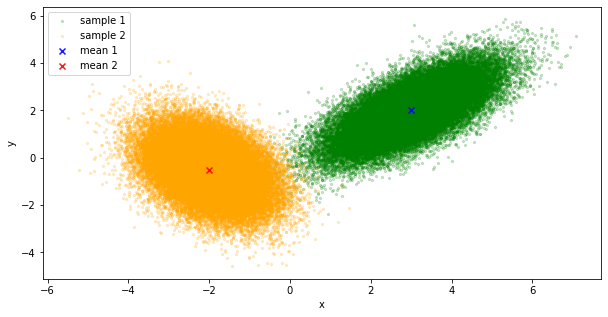

In [ ]:
fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x");ax.set_ylabel("y")
ax.scatter(x1,y1, s=5,color="green", alpha=0.2,label="sample 1")
ax.scatter(x2,y2, s=5,color="orange", alpha=0.2,label="sample 2")
ax.scatter(mu1[0], mu1[1], marker="x", color="blue", alpha=0.9,label="mean 1")
ax.scatter(mu2[0], mu2[1], marker="x", color="red", alpha=0.9,label="mean 2")
ax.legend()
plt.show()
plt.close()

こんな感じ。

二次元のヒストグラムにすると

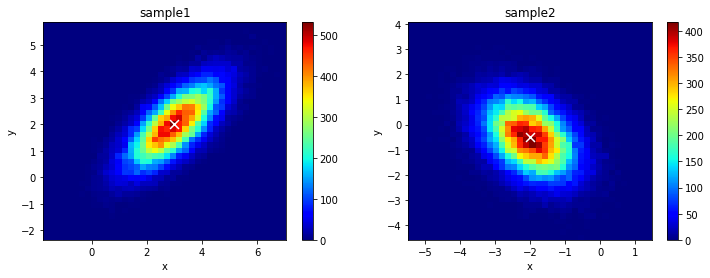

In [ ]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
H1 = ax1.hist2d(x1,y1, bins=40, cmap=cm.jet)
ax1.scatter(mu1[0],mu1[1],s=80,color="w",marker="x")
ax1.set_title('sample1')
ax1.set_xlabel('x'); ax1.set_ylabel('y')
plt.colorbar(H1[3],ax=ax1)

ax2 = fig.add_subplot(122)
H2 = ax2.hist2d(x2,y2, bins=40, cmap=cm.jet)
ax2.scatter(mu2[0],mu2[1],s=80,color="w",marker="x")
ax2.set_title('sample2')
ax2.set_xlabel('x'); ax2.set_ylabel('y')
plt.colorbar(H2[3],ax=ax2)
plt.show()

中心付近にたくさん分布している様子が見て取れます。

各サンプルごとに、$x$,$y$の分散、共分散を計算してみると...


In [ ]:
print("Sample1")
print("var(x)", np.var(x1), "var(y)", np.var(y1), "cov(x,y)", np.cov(x1,y1)[0,1])

print("Sample2")
print("var(x)", np.var(x2), "var(y)", np.var(y2), "cov(x,y)", np.cov(x2,y2)[0,1])

Sample1
var(x) 0.994590632112357 var(y) 0.9890686124916055 cov(x,y) 0.6931785449875472
Sample2
var(x) 0.5996593224718298 var(y) 0.996967770694425 cov(x,y) -0.29333540781674877


確かに上で与えた共分散の各成分ともちゃんと一致しています。

-- 

ちなみに...サンプルを使うのではなく、  
式から計算される値をつかって3次元の図を描くと

In [ ]:
nmesh= 1024 
x = np.linspace(-6, 6, nmesh)
y = np.linspace(-6, 6, nmesh)
X, Y = np.meshgrid(x, y)

Z = np.exp( -0.5 * ( (X-mu1[0])* cov1[0][0] * (X-mu1[0]) + (Y-mu1[1])*cov1[1][1]* (Y-mu1[1])  - 2 * (X-mu1[0])*cov1[0][1]* (Y-mu1[1])  ))  / ( 2*np.pi * np.sqrt(np.linalg.det(cov1)) )
Z2 = np.exp( -0.5 * ( (X-mu2[0])* cov2[0][0] * (X-mu2[0]) + (Y-mu2[1])*cov2[1][1]* (Y-mu2[1]) - 2 * (X-mu2[0])*cov2[0][1]* (Y-mu2[1]) )) / ( 2*np.pi * np.sqrt(np.linalg.det(cov2) ))

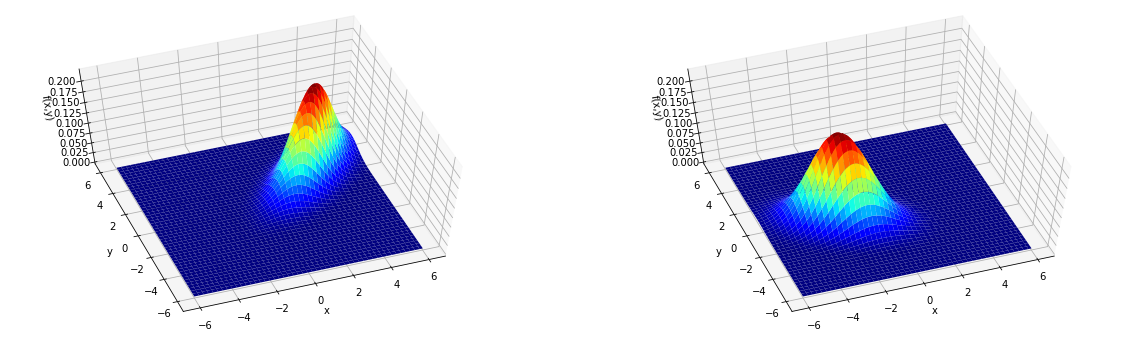

In [ ]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (20, 6))
axL = fig.add_subplot(121, projection="3d")
axR = fig.add_subplot(122, projection="3d")

axL.set_xlabel("x"); axL.set_ylabel("y"); axL.set_zlabel("f(x,y)");axL.view_init(azim=-110,elev=60)
axR.set_xlabel("x"); axR.set_ylabel("y"); axR.set_zlabel("f(x,y)");axR.view_init(azim=-110,elev=60)

axL.plot_surface(X,Y, Z, cmap = cm.jet) 
axR.plot_surface(X,Y, Z2, cmap = cm.jet)

plt.show()

こんな感じ。  
x,yのメッシュ点をいっぱいつくって、各点でのzの値を定義に則って計算し、  
z=f(x,y)の値に応じて色をつけている.

## $\clubsuit$ ランダムウォーク(酔歩)

ここまでの乱数の生成方法を応用すると、ランダムウォーク(酔歩)と呼ばれるものを実装することもできます。

あなたは原点(0,0)に立っていて、毎秒ごとに[-1,1]の一様乱数に従ってx方向とy方向に移動するとします。  
T秒後に立ってる場所や、軌跡をプロットしてみましょう。

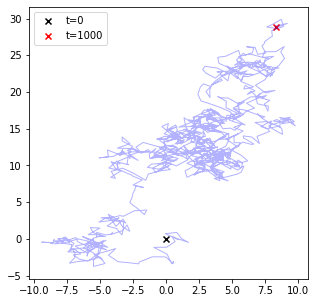

In [ ]:
import numpy as np
xy = np.array([0.0,0.0]) #開始地点
T = 1000 #stepの数

random.seed(1234) ## 同じ答えにしたければ乱数を固定しておきましょう
trajectory = []
for step in range(T):
    xy += np.array([ random.uniform(-1,1), random.uniform(-1,1)])
    trajectory += [ [ xy[0],xy[1]] ]
trajectory= np.array(trajectory).T 

fig = plt.figure(figsize=(5,5))
plt.scatter(0,0,marker="x",color="black",label="t=0")
plt.scatter(xy[0],xy[1],marker="x",color="red",label="t="+str(T))
plt.plot(trajectory[0],trajectory[1],color="blue",linewidth=1,alpha=0.3)
plt.legend()
plt.show()
plt.close()

今の場合、x方向y方向いずれも、  
特別な方向への指向はなく完全にランダムですが、  
獲得関数や勾配といったものが定義されるとさらなる応用が考えられます。

たとえば、地図に載っていない山があったと仮定して、  
その山の頂上にたどり着くためには、上のようなランダムウォークでは効率が悪いので、  
山の傾斜の情報(勾配)を利用しながらランダムな大きさで進む、といった方法が思いつきます。  

大きさをランダムにすることで、局所的な峠に捕まることを避けることもできるかもしれません(場合によりけり).


**$\clubsuit$進んだ注**

ランダムウォークやその派生の方法は、  
最適化や確率分布からのサンプリングが必要な状況下でよく用いられ、  
統計学、自然科学、機械学習など様々な分野で活躍しています。  
c.f. サンプリング,マルコフ連鎖モンテカルロ法